# TASK 1
## Installing required libraries

In [ ]:
!pip install ts2vg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 7.1 MB/s 


In [ ]:
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 7.6 MB/s 


In [ ]:
!pip install pycairo
!pip install cairocffi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 344 kB 7.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  ERROR: Failed building wheel for pycairo
Failed to build pycairo
ERROR: Could not build wheels for pycairo which use PEP 517 and cannot be installed directly
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 4.6 MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.4.0-py3-none-any.whl size=88775 sha256=764187614f7feddbbcd3904255b5f7f7c5201d686f72e9b69a8d096e1b462184
  Stored in directory: /root/.cache/pip/wheels/01/a9/c0/5c05f9dd73c21f9a7716690642823cdba55594d17a9bd69daf
Successfully built cairocffi


## Uploaded the dataset to google drive and mounted google drive to colab 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Initializing arrays. These arrays will be used for constructing file paths to differnt csv files in dataset

In [ ]:
import pandas as pd
axis = ['X','Y','Z']
activity = ['acc_climbingdown_csv','acc_climbingup_csv','acc_running_csv','acc_walking_csv']
sensor_postion =  ['_chest.csv','_head.csv']
df = pd.DataFrame(columns= ['Sensor_position','Method','Subject','Accelerometer_axis','Average_degree','Network_diameter','Average_path_length','Activity'])

The following method takes the subject number, activity index, sensor position index, and axis index as arguments. These arguments are used to index array values from variables defined in the previous chunk and construct file paths. pd.read_csv command is enclosed in the try-except block because some files in Subjects 4,7, and 14 needed extra customization; hence we needed to handle FileNotFoundError. A subset of the data frame (rows 1000:2024) is then passed to calculate_natural_visibility_graph_features(df_data_per_file)  and calculate_natural_visibility_graph_features(df_data_per_file) to compute the graph features. New records are appended to the df variable, which is the output table.

In [ ]:
def populate_output_table(subject_number,activity_index,sensor_position_index,axis_index):
  file_path = '/content/gdrive/MyDrive/FDA_Project_2/Subject ' + str(subject_number) +\
                '/' + activity[activity_index] + '/' + activity[activity_index][:-4]  + sensor_postion[sensor_position_index]
  try:
    df_data_per_file = pd.read_csv(file_path)
  except:
    return
  natural_average_degree,natural_network_diameter,natural_average_path_length = calculate_natural_visibility_graph_features(df_data_per_file.iloc[1000:2024,(axis_index+2)].tolist())
  position = sensor_postion[sensor_position_index][1:-4]
  df.loc[df.shape[0]] = [position,'NVG','Subject '+str(subject_number),axis[axis_index]
                           ,natural_average_degree,natural_network_diameter,natural_average_path_length,activity[activity_index][4:-4]]                           
  
  horizontal_average_degree,horizontal_network_diameter,horizontal_average_path_length = calculate_horizontal_visibility_graph_features(df_data_per_file.iloc[1000:2024,(axis_index+2)].tolist())
  df.loc[df.shape[0]] = [position,'HVG','Subject '+str(subject_number),axis[axis_index]
                           ,horizontal_average_degree,horizontal_network_diameter,horizontal_average_path_length,activity[activity_index][4:-4]]


In [ ]:
import numpy as np
from ts2vg import NaturalVG
from ts2vg import HorizontalVG

def calculate_natural_visibility_graph_features(df_data_per_file):
    natural_visibility_graph_model = NaturalVG()
    natural_visibility_graph_model.build(df_data_per_file)
    natural_visibility_graph = natural_visibility_graph_model.as_igraph()
    natural_average_degree = np.mean(natural_visibility_graph.degree())
    natural_network_diameter = natural_visibility_graph.diameter()
    natural_average_path_length = natural_visibility_graph.average_path_length()
    return [natural_average_degree,natural_network_diameter,natural_average_path_length]
 
def calculate_horizontal_visibility_graph_features(df_data_per_file):   
    horizontal_visibility_graph_model = HorizontalVG()
    horizontal_visibility_graph_model.build(df_data_per_file)
    horizontal_visibility_graph = horizontal_visibility_graph_model.as_igraph()
    horizontal_average_degree = np.mean(horizontal_visibility_graph.degree())
    horizontal_network_diameter = horizontal_visibility_graph.diameter()
    horizontal_average_path_length = horizontal_visibility_graph.average_path_length()
    return [horizontal_average_degree,horizontal_network_diameter,horizontal_average_path_length]
    #print(df.shape)
    

populate_output_table_for_special_cases() is same as the populate_output_table() defined earlier.
The purpose of creating a separate function is to handle the special customizations for file paths for Subjects 4,7 and 14. These subjects are special because they have 3 files for climbing up activity and 3 files for climbing down activity. All these files are considered in the below function.

In [ ]:
special_subjects = [4,7,14]
multiple_activity = ['acc_climbingdown_1_csv','acc_climbingdown_2_csv','acc_climbingdown_3_csv'
,'acc_climbingup_1_csv','acc_climbingup_2_csv','acc_climbingup_3_csv']

In [ ]:
def populate_output_table_for_special_cases(subject_number,multiple_activity_index,sensor_position_index,axis_index):
  activity_folder_name = multiple_activity[multiple_activity_index][:-6] + multiple_activity[multiple_activity_index][-4:] 
  file_path = '/content/gdrive/MyDrive/FDA_Project_2/Subject ' + str(subject_number) +\
                '/' + activity_folder_name + '/' + multiple_activity[multiple_activity_index] + '/' + activity_folder_name[:-4]  + sensor_postion[sensor_position_index]
  df_data_per_file = pd.read_csv(file_path)
  natural_average_degree,natural_network_diameter,natural_average_path_length = calculate_natural_visibility_graph_features(df_data_per_file.iloc[1000:2024,(axis_index+2)].tolist())
  position = sensor_postion[sensor_position_index][1:-4]
  df.loc[df.shape[0]] = [position,'NVG','Subject '+str(subject_number),axis[axis_index]
                           ,natural_average_degree,natural_network_diameter,natural_average_path_length,activity_folder_name[4:-4]]                           
  
  horizontal_average_degree,horizontal_network_diameter,horizontal_average_path_length = calculate_horizontal_visibility_graph_features(df_data_per_file.iloc[1000:2024,(axis_index+2)].tolist())
  df.loc[df.shape[0]] = [position,'HVG','Subject '+str(subject_number),axis[axis_index]
                           ,horizontal_average_degree,horizontal_network_diameter,horizontal_average_path_length,activity_folder_name[4:-4]]

In [ ]:
[populate_output_table(i,j,k,l) for l in range(3) for k in range(len(sensor_postion)) for j in range(len(activity)) for i in range (1,16)]
df

,Sensor_position,Method,Subject,Accelerometer_axis,Average_degree,Network_diameter,Average_path_length,Activity
0,chest,NVG,Subject 4,X,9.732422,10,4.482766,climbingdown
1,chest,HVG,Subject 4,X,3.955078,30,13.039975,climbingdown
2,chest,NVG,Subject 7,X,8.757812,9,4.587914,climbingdown
3,chest,HVG,Subject 7,X,3.964844,26,10.140701,climbingdown
4,chest,NVG,Subject 14,X,8.181641,10,4.732678,climbingdown
...,...,...,...,...,...,...,...,...
859,head,HVG,Subject 13,Z,3.906250,52,21.635749,walking
860,head,NVG,Subject 14,Z,12.580078,10,4.622228,walking
861,head,HVG,Subject 14,Z,3.958984,32,13.257349,walking
862,head,NVG,Subject 15,Z,13.353516,9,4.674661,walking


In [ ]:
[populate_output_table_for_special_cases(i,j,k,l) for l in range(3) for k in range(len(sensor_postion)) for j in range(len(multiple_activity)) for i in special_subjects]
df

,Sensor_position,Method,Subject,Accelerometer_axis,Average_degree,Network_diameter,Average_path_length,Activity
0,chest,NVG,Subject 4,X,9.732422,10,4.482766,climbingdown
1,chest,HVG,Subject 4,X,3.955078,30,13.039975,climbingdown
2,chest,NVG,Subject 7,X,8.757812,9,4.587914,climbingdown
3,chest,HVG,Subject 7,X,3.964844,26,10.140701,climbingdown
4,chest,NVG,Subject 14,X,8.181641,10,4.732678,climbingdown
...,...,...,...,...,...,...,...,...
1075,head,HVG,Subject 4,Z,3.906250,47,18.514142,climbingup
1076,head,NVG,Subject 7,Z,13.968750,10,4.485164,climbingup
1077,head,HVG,Subject 7,Z,3.943359,34,13.126819,climbingup
1078,head,NVG,Subject 14,Z,16.173828,13,5.384101,climbingup


In [ ]:
df_task1 = df

In [ ]:
df_task1

,Sensor_position,Method,Subject,Accelerometer_axis,Average_degree,Network_diameter,Average_path_length,Activity
0,chest,NVG,Subject 4,X,9.732422,10,4.482766,climbingdown
1,chest,HVG,Subject 4,X,3.955078,30,13.039975,climbingdown
2,chest,NVG,Subject 7,X,8.757812,9,4.587914,climbingdown
3,chest,HVG,Subject 7,X,3.964844,26,10.140701,climbingdown
4,chest,NVG,Subject 14,X,8.181641,10,4.732678,climbingdown
...,...,...,...,...,...,...,...,...
1075,head,HVG,Subject 4,Z,3.906250,47,18.514142,climbingup
1076,head,NVG,Subject 7,Z,13.968750,10,4.485164,climbingup
1077,head,HVG,Subject 7,Z,3.943359,34,13.126819,climbingup
1078,head,NVG,Subject 14,Z,16.173828,13,5.384101,climbingup


In [ ]:
import seaborn as sns

Scatter plot for walking and running

Creating Plot1 dataframe for specific activity Walking and Running

Scatter Plot for Average Degree vs Network Diameter for Accelerometer Axis = X

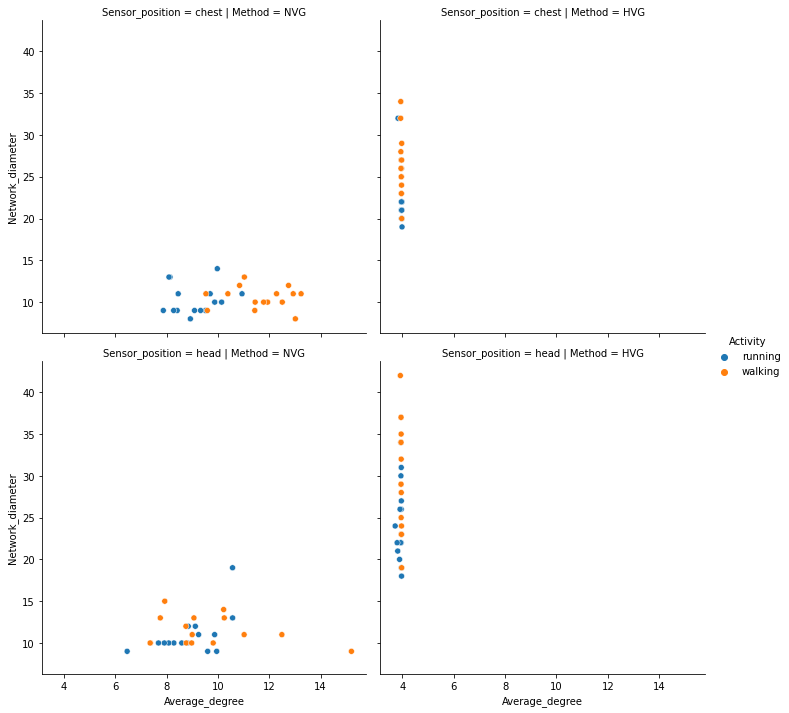

In [ ]:
plot1=df_task1[(df_task1['Activity']=='walking') | (df_task1['Activity']=='running')]
sns.relplot(data=plot1[plot1['Accelerometer_axis']=='X'],x="Average_degree",y='Network_diameter',hue='Activity',row='Sensor_position',col='Method')

Scatter Plot for Average Degree vs Network Diameter for Accelerometer Axis = Y

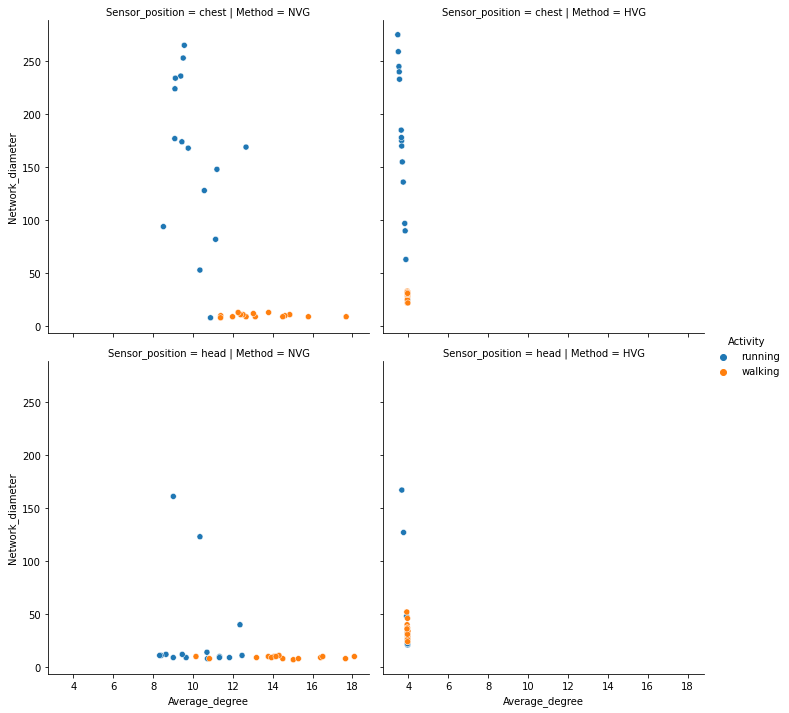

In [ ]:
sns.relplot(data=plot1[plot1['Accelerometer_axis']=='Y'],x="Average_degree",y='Network_diameter',hue='Activity',row='Sensor_position',col='Method')


Scatter Plot for Average Degree vs Network Diameter for Accelerometer Axis = Z

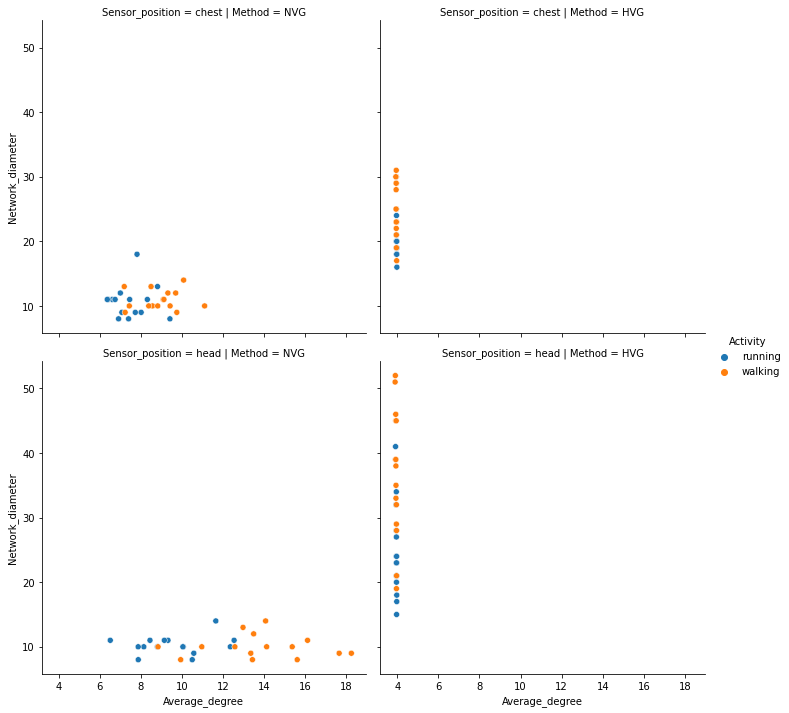

In [ ]:
sns.relplot(data=plot1[plot1['Accelerometer_axis']=='Z'],x="Average_degree",y='Network_diameter',hue='Activity',row='Sensor_position',col='Method')


Scatter plot for climbing up and climbing down

Creating Plot2 dataframe for specific activity Climbing up and Climbing down

Scatter Plot for Average Degree vs Network Diameter for Accelerometer Axis = X

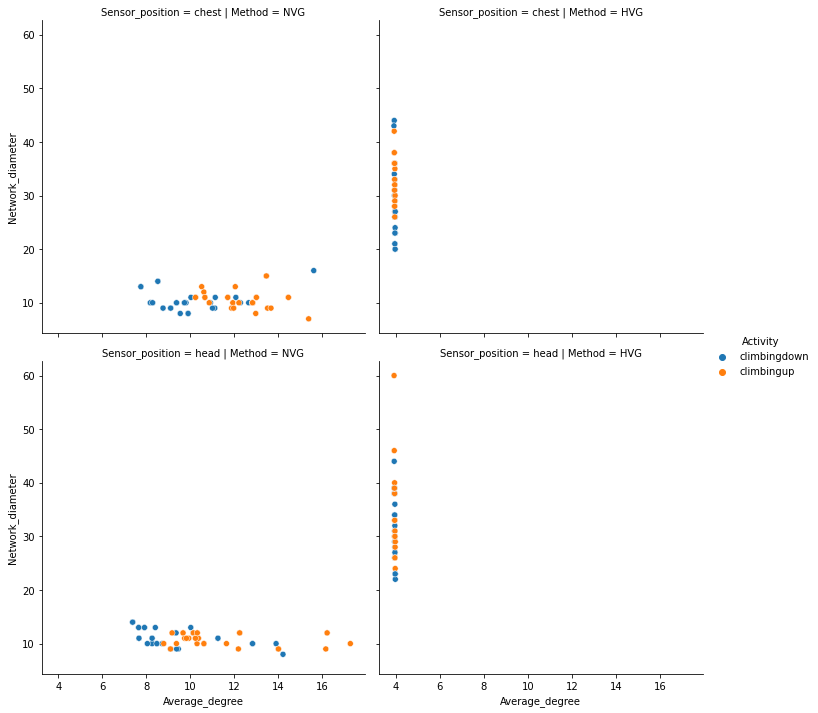

In [ ]:
plot2=df_task1[(df_task1['Activity']=='climbingdown') | (df_task1['Activity']=='climbingup')]
sns.relplot(data=plot2[plot2['Accelerometer_axis']=='X'],x="Average_degree",y='Network_diameter',hue='Activity',row='Sensor_position',col='Method')

Scatter Plot for Average Degree vs Network Diameter for Accelerometer Axis = Y

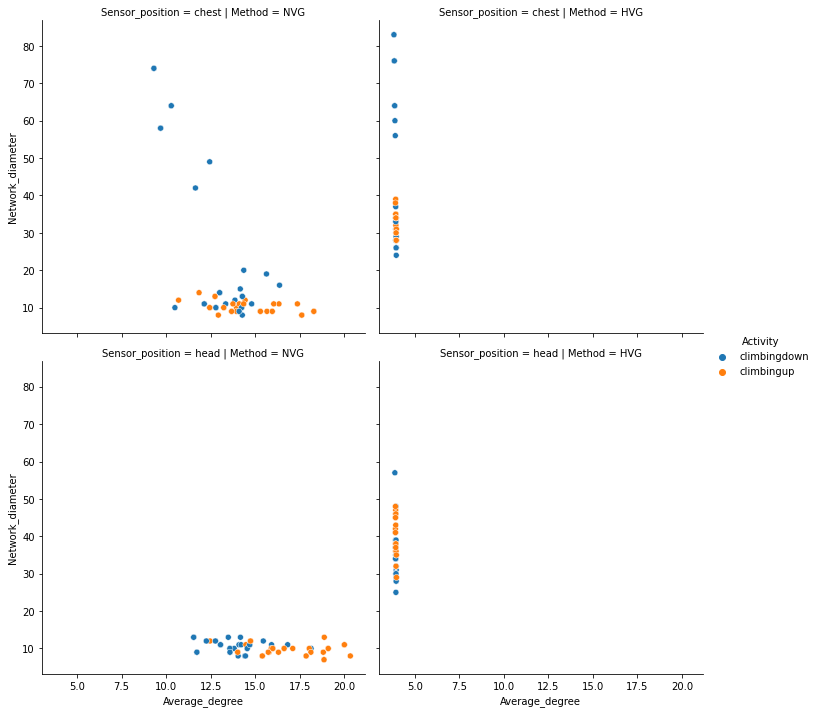

In [ ]:
sns.relplot(data=plot2[plot2['Accelerometer_axis']=='Y'],x="Average_degree",y='Network_diameter',hue='Activity',row='Sensor_position',col='Method')

Scatter Plot for Average Degree vs Network Diameter for Accelerometer Axis = Z

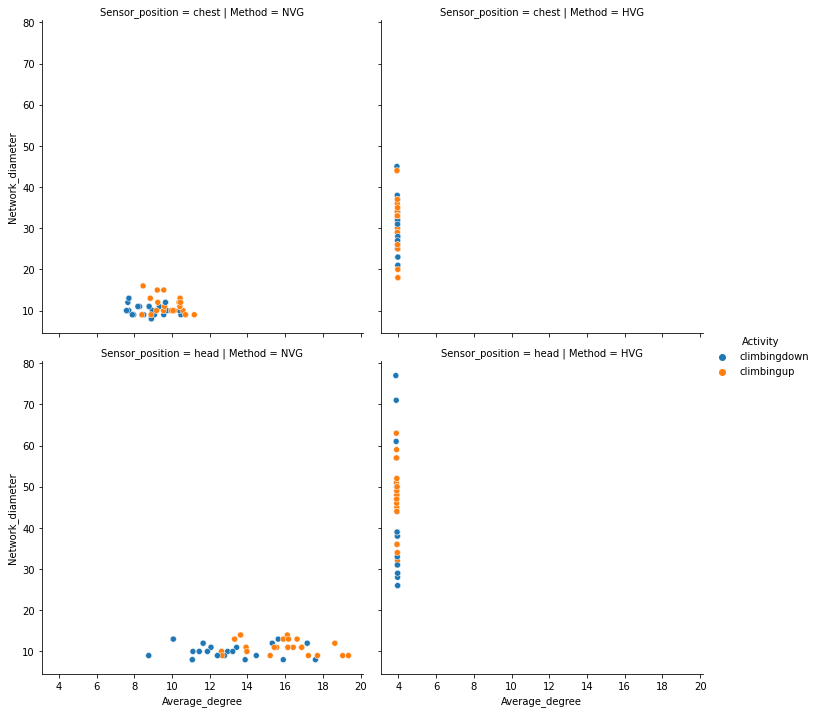

In [ ]:
sns.relplot(data=plot2[plot2['Accelerometer_axis']=='Z'],x="Average_degree",y='Network_diameter',hue='Activity',row='Sensor_position',col='Method')

# TASK 2

In [ ]:
df1 = pd.DataFrame(columns=['Sensor_position','Subject','Accelerometer_axis','Signal_length','Dimension','Delay','Permuation_entropy','Complexity','Activity'])

In [ ]:
''' This module has essential functions supporting
fast and effective computation of permutation entropy and
its different variations.'''
import numpy as np


def s_entropy(freq_list):
    ''' This function computes the shannon entropy of a given frequency distribution.
    USAGE: shannon_entropy(freq_list)
    ARGS: freq_list = Numeric vector representing the frequency distribution
    OUTPUT: A numeric value representing shannon's entropy'''
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return(sh_entropy)

def ordinal_patterns(ts, embdim, embdelay):
    ''' This function computes the ordinal patterns of a time series for a given embedding dimension and embedding delay.
    USAGE: ordinal_patterns(ts, embdim, embdelay)
    ARGS: ts = Numeric vector representing the time series, embdim = embedding dimension (3<=embdim<=7 prefered range), embdelay =  embdding delay
    OUPTUT: A numeric vector representing frequencies of ordinal patterns'''
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*(m-1)):, :] 
    permutation = np.argsort(partition)
    idx = _hash(permutation)

    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:]) 
    

def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)

def complexity(op):
    ''' This function computes the complexity of a time series defined as: Comp_JS = Q_o * JSdivergence * pe
    Q_o = Normalizing constant
    JSdivergence = Jensen-Shannon divergence
    pe = permutation entopry
    ARGS: ordinal pattern'''
    pe = p_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)

def weighted_ordinal_patterns(ts, embdim, embdelay):
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    xm = np.mean(partition, axis=1)
    weight = np.mean((partition - xm[:, None])**2, axis=1)
    permutation = np.argsort(partition)
    idx = _hash(permutation)
    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = sum(weight[i == idx])

    return list(counts[counts != 0]) 

In [ ]:
embedded_dimension_array = np.array([3,4,5,6],dtype=int)
embedded_delay_array = np.array([1,2,3],dtype=int)
signal_length_array = np.array([1024,2048,4096],dtype=int)

In [ ]:
def calculate_entropy_complexity(full_time_series,embedded_dimension,embedded_delay,signal_length,subject_number,activity_folder_name,sensor_position_index,axis_index):
  time_series_chunk = full_time_series[1000:(1000+signal_length)]
  op = ordinal_patterns(time_series_chunk,embedded_dimension,embedded_delay)
  permutation_entropy = p_entropy(op)
  comp_js = complexity(op)
  df1.loc[df1.shape[0]] = [sensor_postion[sensor_position_index][1:-4],'Subject '+str(subject_number),axis[axis_index],signal_length,embedded_dimension,embedded_delay,permutation_entropy,comp_js,activity_folder_name[4:-4]]

The following method takes the subject number, activity index, sensor position index, and axis index as arguments. These arguments are used to index array values from variables defined in the previous chunk and construct file paths. pd.read_csv command is enclosed in the try-except block because some files in Subjects 4,7, and 14 needed extra customization; hence we needed to handle FileNotFoundError. The data frame is then passed to calculate_entropy_complexity function which calulates the permutation entropy and complexity for diffent values of signal lengths, embedded dimension and embedded delay. New records are appended to the df1 variable, which is the output table.

In [ ]:
def populate_entropy_complexity(subject_number,activity_index,sensor_position_index,axis_index):
  file_path = '/content/gdrive/MyDrive/FDA_Project_2/Subject ' + str(subject_number) +\
                '/' + activity[activity_index] + '/' + activity[activity_index][:-4]  + sensor_postion[sensor_position_index]
  try:
    df_sensor_data = pd.read_csv(file_path)
  except FileNotFoundError:
    return
  senor_data_for_given_axis = df_sensor_data.iloc[:,(axis_index+2)].to_numpy(dtype=float)
  [calculate_entropy_complexity(senor_data_for_given_axis,m,t,s,subject_number,activity[activity_index],sensor_position_index,axis_index) for m in embedded_dimension_array for t in embedded_delay_array for s in signal_length_array]

populate_entropy_complexity_for_special_cases() is same as the populate_entropy_complexity() defined earlier.
The purpose of creating a separate function is to handle the special customizations for file paths for Subjects 4,7 and 14. These subjects are special because they have 3 files for climbing up activity and 3 files for climbing down activity. All these files are considered in the below function.

In [ ]:
def populate_entropy_complexity_for_special_cases(subject_number,multiple_activity_index,sensor_position_index,axis_index):
  activity_folder_name = multiple_activity[multiple_activity_index][:-6] + multiple_activity[multiple_activity_index][-4:] 
  file_path = '/content/gdrive/MyDrive/FDA_Project_2/Subject ' + str(subject_number) +\
                '/' + activity_folder_name + '/' + multiple_activity[multiple_activity_index] + '/' + activity_folder_name[:-4]  + sensor_postion[sensor_position_index]
  df_sensor_data = pd.read_csv(file_path)
  senor_data_for_given_axis = df_sensor_data.iloc[:,(axis_index+2)].to_numpy(dtype=float)
  [calculate_entropy_complexity(senor_data_for_given_axis,m,t,s,subject_number,activity_folder_name,sensor_position_index,axis_index) for m in embedded_dimension_array for t in embedded_delay_array for s in signal_length_array]

In [ ]:
[populate_entropy_complexity(i,j,k,l) for l in range(3) for k in range(len(sensor_postion)) for j in range(len(activity)) for i in range (1,16)]
df1

,Sensor_position,Subject,Accelerometer_axis,Signal_length,Dimension,Delay,Permuation_entropy,Complexity,Activity
0,chest,Subject 1,X,1024,3,1,0.759158,0.181020,climbingdown
1,chest,Subject 1,X,2048,3,1,0.762970,0.178855,climbingdown
2,chest,Subject 1,X,4096,3,1,0.776764,0.170868,climbingdown
3,chest,Subject 1,X,1024,3,2,0.897652,0.088575,climbingdown
4,chest,Subject 1,X,2048,3,2,0.907843,0.080618,climbingdown
...,...,...,...,...,...,...,...,...,...
11659,head,Subject 15,Z,2048,6,2,0.843841,0.224391,walking
11660,head,Subject 15,Z,4096,6,2,0.823950,0.259550,walking
11661,head,Subject 15,Z,1024,6,3,0.930730,0.124337,walking
11662,head,Subject 15,Z,2048,6,3,0.888844,0.184988,walking


In [ ]:
[populate_entropy_complexity_for_special_cases(i,j,k,l) for l in range(3) for k in range(len(sensor_postion)) for j in range(len(multiple_activity)) for i in special_subjects]
df1

,Sensor_position,Subject,Accelerometer_axis,Signal_length,Dimension,Delay,Permuation_entropy,Complexity,Activity
0,chest,Subject 1,X,1024,3,1,0.759158,0.181020,climbingdown
1,chest,Subject 1,X,2048,3,1,0.762970,0.178855,climbingdown
2,chest,Subject 1,X,4096,3,1,0.776764,0.170868,climbingdown
3,chest,Subject 1,X,1024,3,2,0.897652,0.088575,climbingdown
4,chest,Subject 1,X,2048,3,2,0.907843,0.080618,climbingdown
...,...,...,...,...,...,...,...,...,...
15547,head,Subject 14,Z,2048,6,2,0.789263,0.276982,climbingup
15548,head,Subject 14,Z,4096,6,2,0.759282,0.311595,climbingup
15549,head,Subject 14,Z,1024,6,3,0.893976,0.171577,climbingup
15550,head,Subject 14,Z,2048,6,3,0.868350,0.216086,climbingup


In [ ]:
df_task2 = df1

Scatter plot for walking and running

Creating Plot1 dataframe for specific activity Walking and Running with signal strength = 4096, Delay = 1 and Dimension = ( 3,4,5,6 )



In [ ]:
plot1=df_task2[((df_task2['Activity']=='walking') | (df_task2['Activity']=='running')) & (df_task2['Signal_length']==4096) & (df_task2['Delay']==1) & ((df_task2['Dimension']==3) | (df_task2['Dimension']==4) | (df_task2['Dimension']==5) | (df_task2['Dimension']==6))]


Scatter Plot for Permutation Entropy vs Complexity for Accelerometer Axis = X

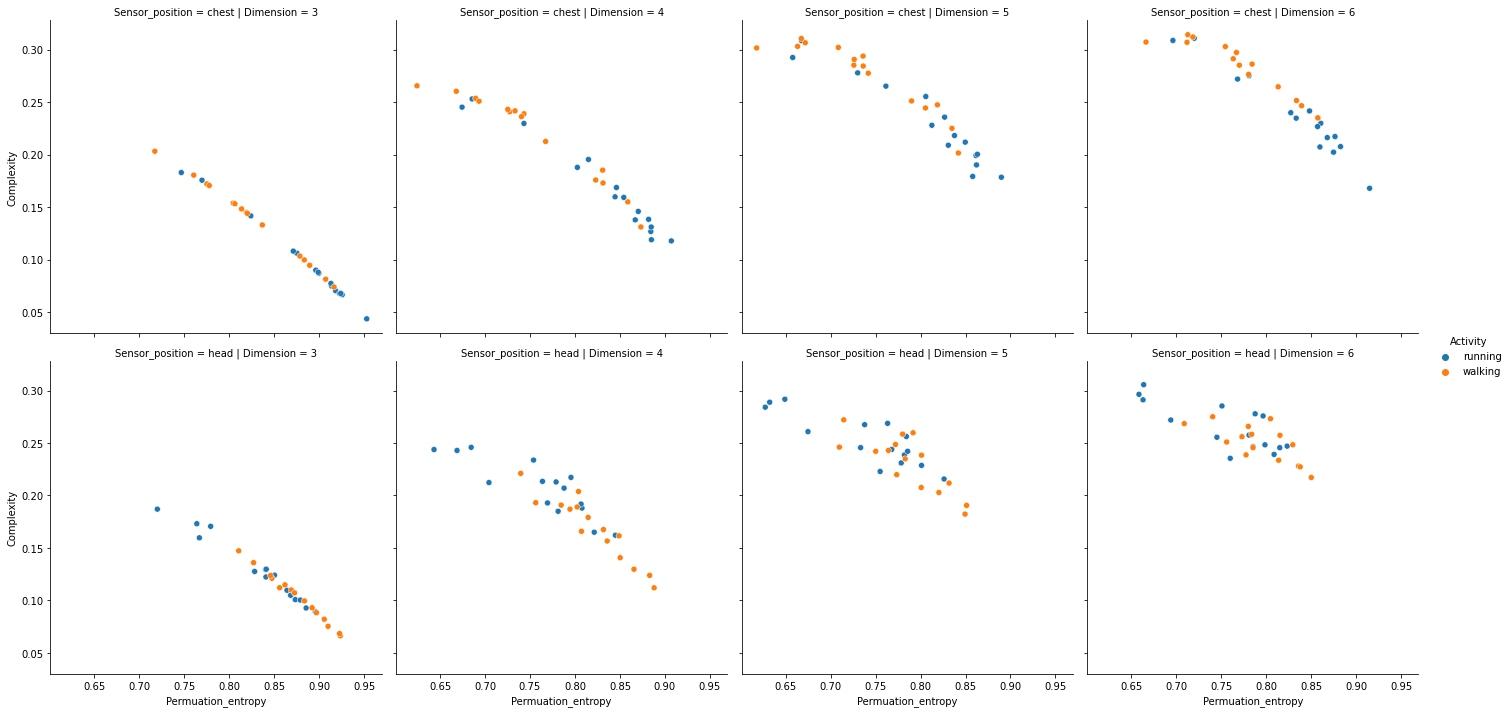

In [ ]:
sns.relplot(data=plot1[plot1['Accelerometer_axis']=='X'],x='Permuation_entropy',y='Complexity',hue='Activity',row='Sensor_position',col='Dimension')

Scatter Plot for Permutation Entropy vs Complexity for Accelerometer Axis = Y

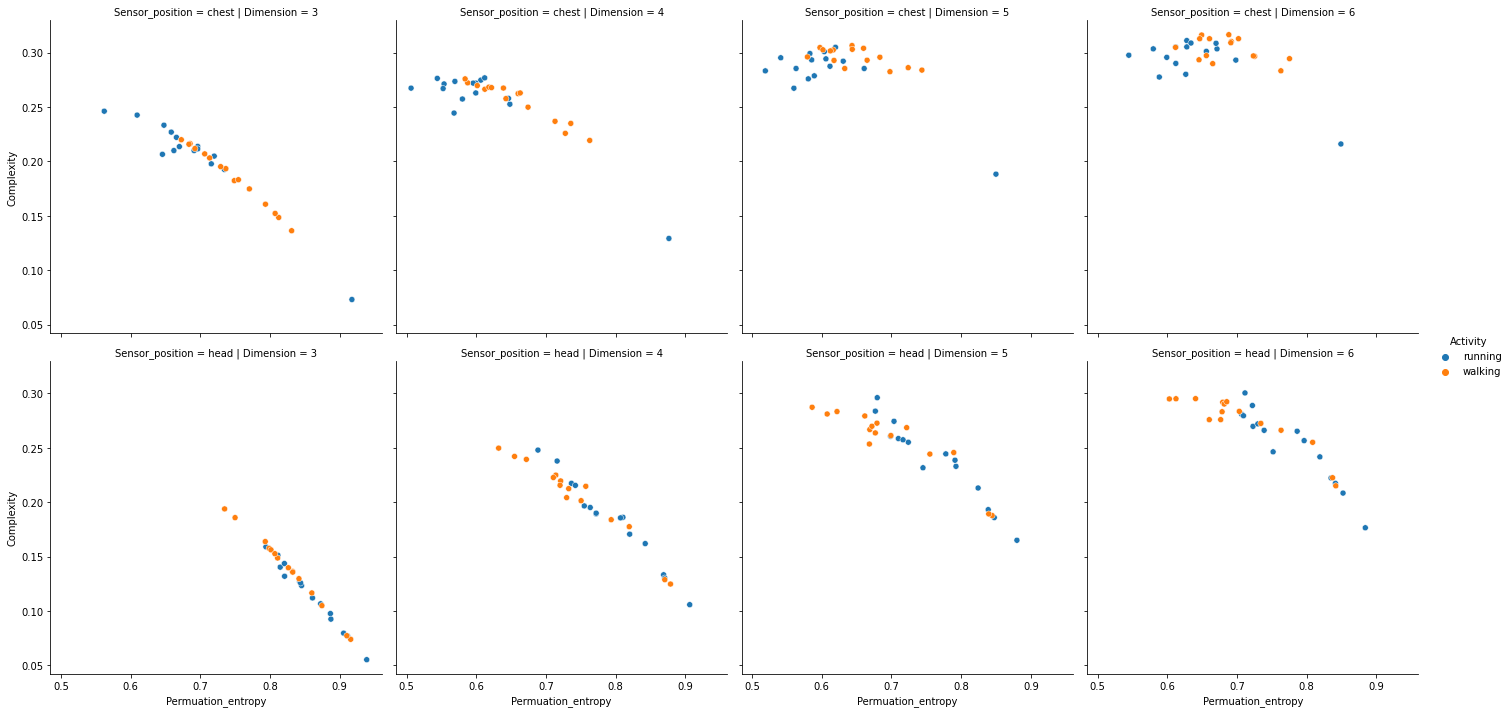

In [ ]:
sns.relplot(data=plot1[plot1['Accelerometer_axis']=='Y'],x='Permuation_entropy',y='Complexity',hue='Activity',row='Sensor_position',col='Dimension')

Scatter Plot for Permutation Entropy vs Complexity for Accelerometer Axis = Z

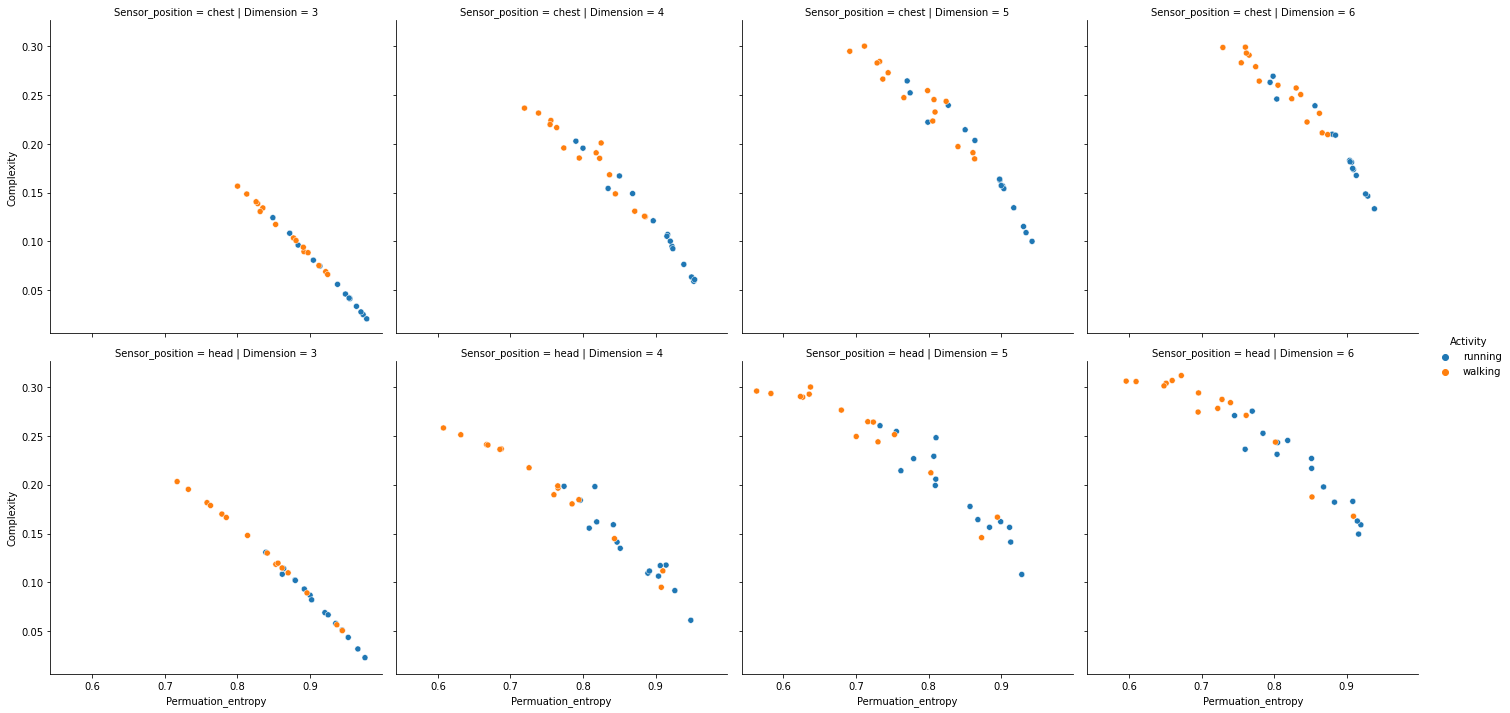

In [ ]:
sns.relplot(data=plot1[plot1['Accelerometer_axis']=='Z'],x='Permuation_entropy',y='Complexity',hue='Activity',row='Sensor_position',col='Dimension')

Scatter plot for climbing up and climbing down




Creating Plot2 dataframe for specific activity Climbing up and Climbing down with signal strength = 4096, Delay = 1 and Dimension = ( 3,4,5,6 )

In [ ]:
plot2=df_task2[((df_task2['Activity']=='climbingup') | (df_task2['Activity']=='climbingdown')) & (df_task2['Signal_length']==4096) & (df_task2['Delay']==1) & ((df_task2['Dimension']==3) | (df_task2['Dimension']==4) | (df_task2['Dimension']==5) | (df_task2['Dimension']==6))]

Scatter Plot for Permutation Entropy vs Complexity for Accelerometer Axis = X

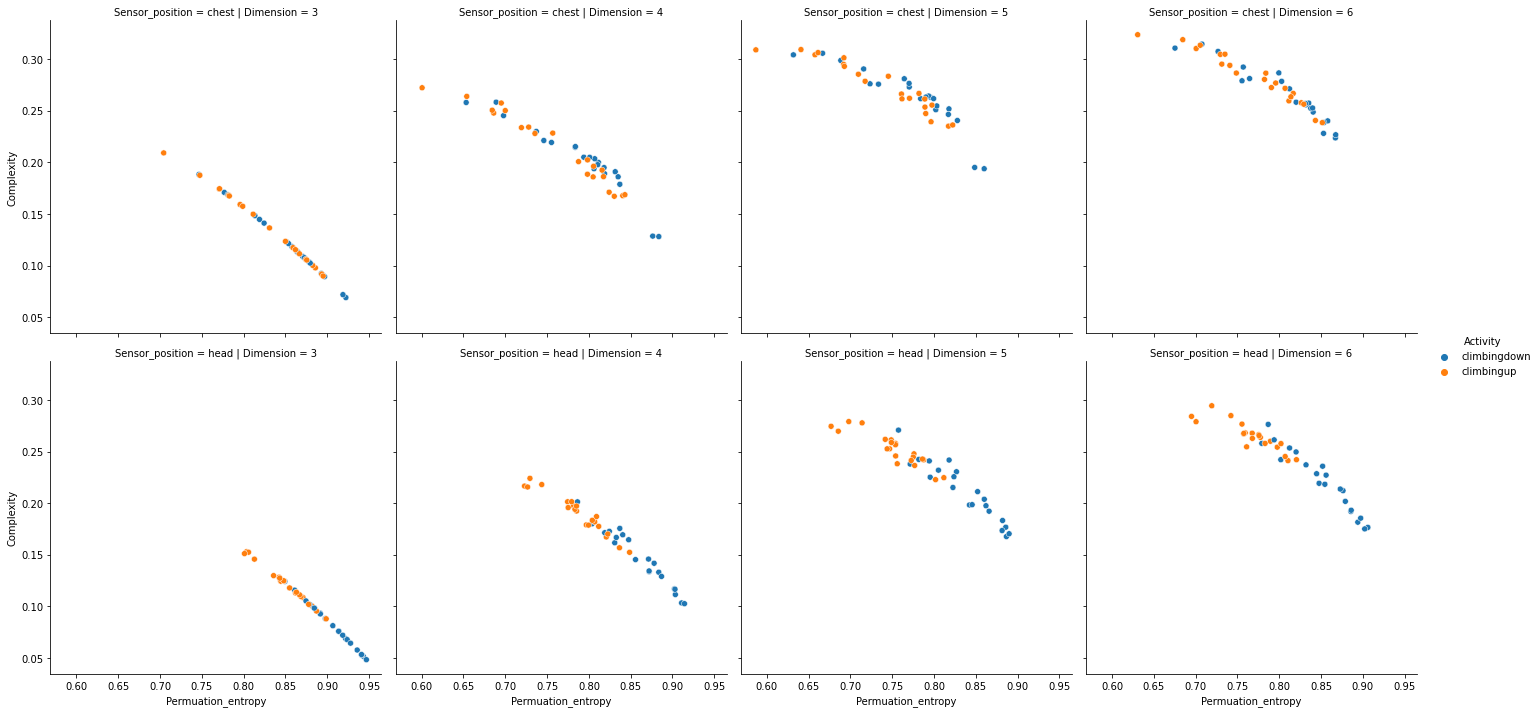

In [ ]:
sns.relplot(data=plot2[plot2['Accelerometer_axis']=='X'],x='Permuation_entropy',y='Complexity',hue='Activity',row='Sensor_position',col='Dimension')

Scatter Plot for Permutation Entropy vs Complexity for Accelerometer Axis = Y

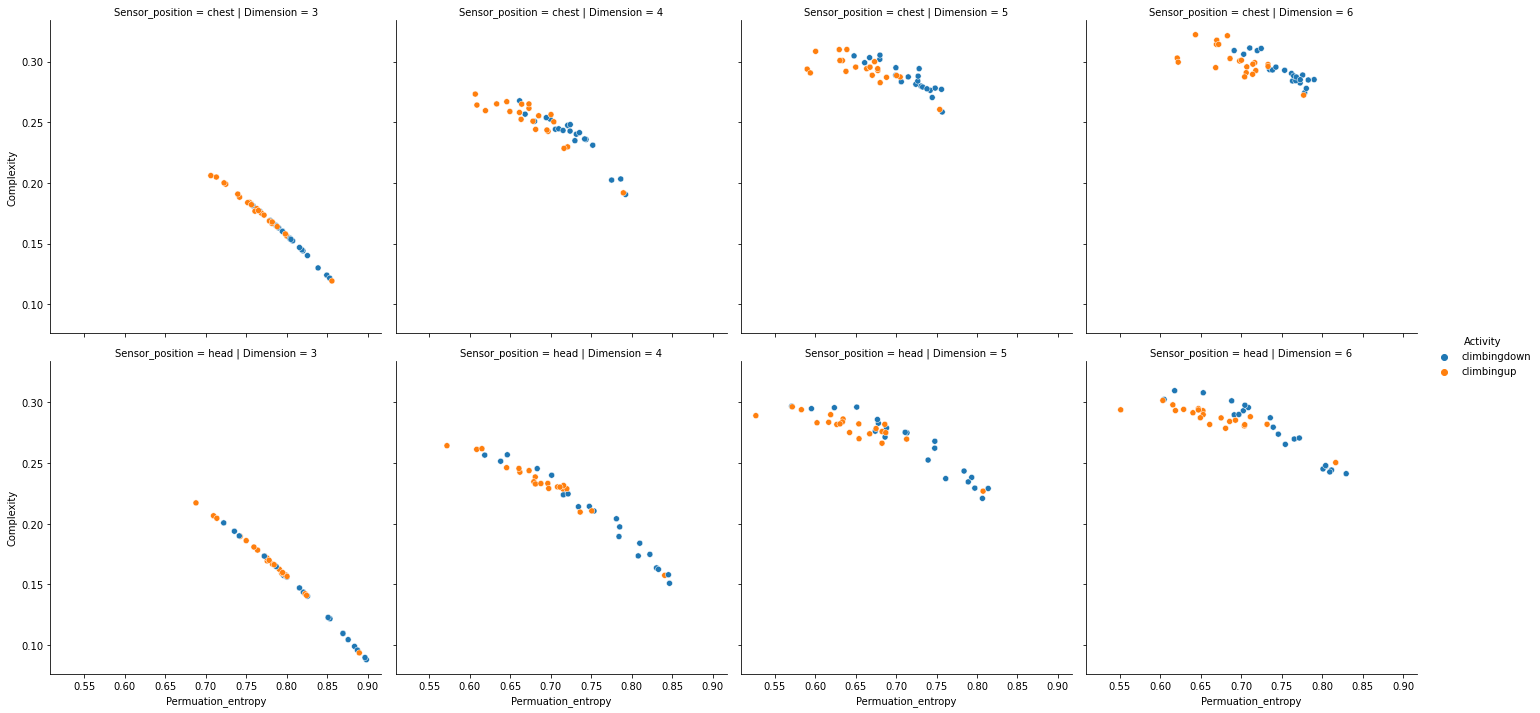

In [ ]:
sns.relplot(data=plot2[plot2['Accelerometer_axis']=='Y'],x='Permuation_entropy',y='Complexity',hue='Activity',row='Sensor_position',col='Dimension')

Scatter Plot for Permutation Entropy vs Complexity for Accelerometer Axis = Z

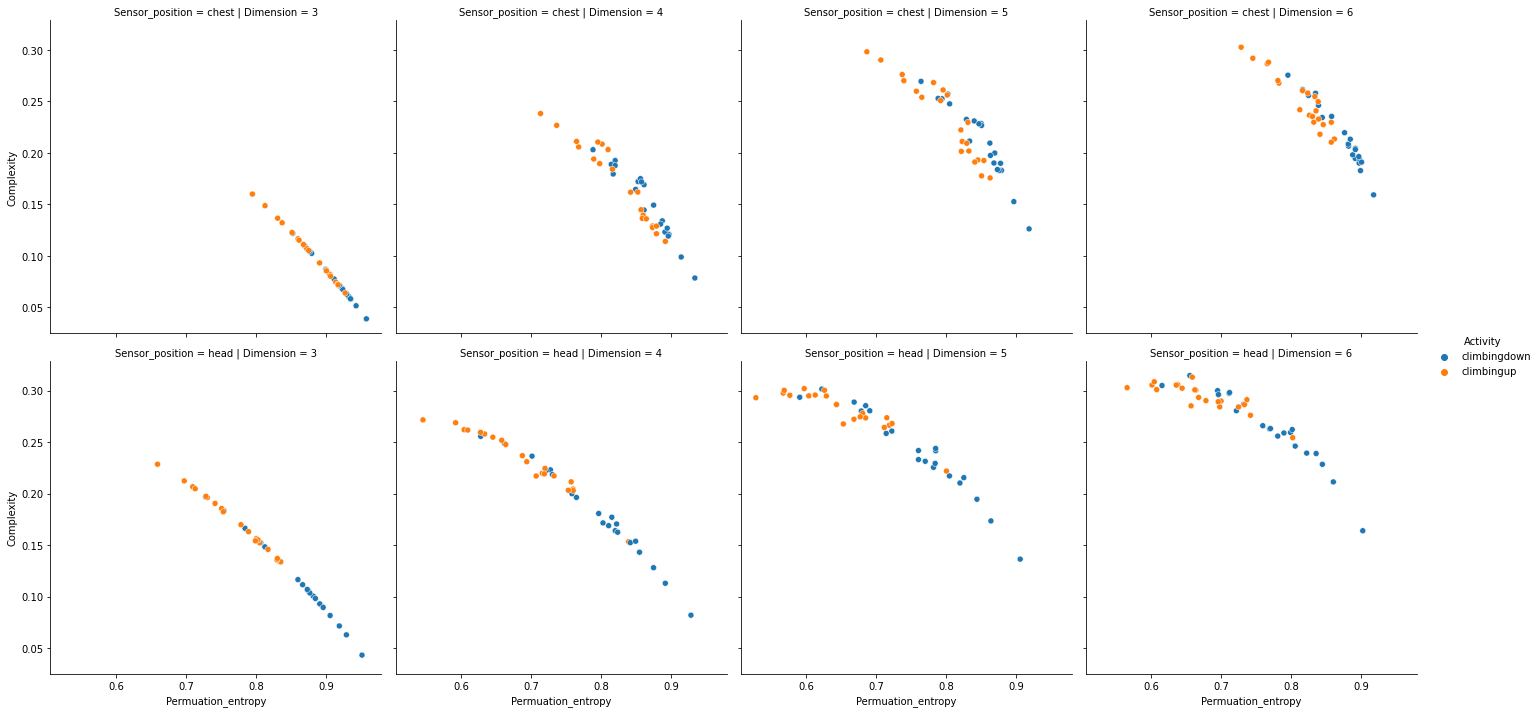

In [ ]:
sns.relplot(data=plot2[plot2['Accelerometer_axis']=='Z'],x='Permuation_entropy',y='Complexity',hue='Activity',row='Sensor_position',col='Dimension')